# K-means Clustering
K-means is a clustering algorithm used to partition a dataset into 𝑘 distinct, non-overlapping subsets or clusters. It aims to minimize the within-cluster sum of squares (also known as inertia)

## How algorithm works
Initialization:
* Choose the number of clusters 𝑘
* Initialize 𝑘 centroids randomly. These can be randomly chosen points from the dataset or generated randomly within the range of the data

Assignment:
* Assign each data point to the nearest centroid. This is typically done using the Euclidean distance, though other distance metrics can be used
* The result is 𝑘 clusters, where each point belongs to the cluster with the nearest centroid

Update:
* Recalculate the centroids of each cluster. The new centroid is the mean of all the points assigned to that cluster

Convergence check:
* Repeat the assignment and update steps until the centroids no longer change significantly or until a maximum number of iterations is reached
* Convergence is typically defined as the point at which the assignment of points to clusters no longer changes, or the changes are minimal


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Optimise_k_means function
The optimise_k_means function is designed to help determine the optimal number of clusters 𝑘 using the "elbow method".

In [2]:
def optimise_k_means(data, max_k, save=None):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
    
    plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)

    if save:
        plt.savefig(save, dpi=300, bbox_inches='tight')

    plt.show()

## K-means using data with industry knowledge

In [3]:
data = pd.read_csv('../data/03_Processed/02_ProcessedData.csv')
data_mapped = data.copy()
data_mapped.set_index('ID', inplace=True)

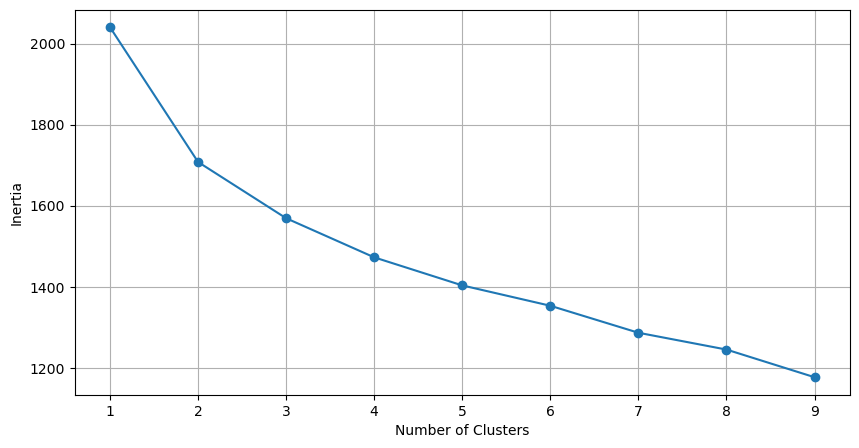

In [4]:
optimise_k_means(data_mapped, 10,'../figures/05_K-meansWithIndustryKnowledge.png')

### Creation of instance of K-means with parameters:
* n_clusters, which means on how many pieces algorithm will partition data
* random_state, which is used to seed the random number generator, which is used by algorithm to ensure that the results are reproducible

In [5]:
kmeans = KMeans(n_clusters=6,random_state=42)

### kmeans.fit()
kmeans.fit(data_mapped) fits the K-means clustering model to the dataset. It involves initializing cluster centroids, assigning data points to clusters, recalculating centroids, and iterating these steps until convergence.

In [6]:
kmeans.fit(data_mapped)

KMeans(n_clusters=6, random_state=42)

### kmeans.labels_
data_mapped['kmeans_6'] = kmeans.labels_ is assigning the cluster labels generated by the K-means algorithm to a new column in the data_mapped

In [7]:
data_mapped['kmeans_6'] = kmeans.labels_

In [8]:
data_mapped_cluster_assignment = data_mapped.groupby('kmeans_6').apply(lambda x: list(x.index)).to_dict()

print("\nAssignment of objects to clusters:")
for cluster, members in data_mapped_cluster_assignment.items():
    cluster +=1
    print(f"Cluster {cluster}: {members}")


Przypisanie obiektów do klastrów:
Klaster 1: [19, 25, 28, 34, 58]
Klaster 2: [3, 7, 9, 11, 12, 14, 15, 16, 18, 20, 22, 23, 26, 27, 35, 37, 41, 42, 43, 46, 47, 48, 50, 52, 53, 54, 55, 57, 61, 64, 67]
Klaster 3: [2, 4, 24, 29, 32, 36, 44]
Klaster 4: [5, 6, 10, 13, 21, 30, 33, 38, 45, 49]
Klaster 5: [1, 17, 63]
Klaster 6: [31, 51, 59]


## K-means using data without industry knowledge
The steps that were used previously will be used accordingly, but with different data

In [9]:
datawithoutknowledge = pd.read_csv('../data/03_Processed/02_ProcessedDataWithoutIndustryKnowledge.csv')
datawithoutknowledge_mapped = datawithoutknowledge.copy()
datawithoutknowledge_mapped.set_index('ID', inplace=True)

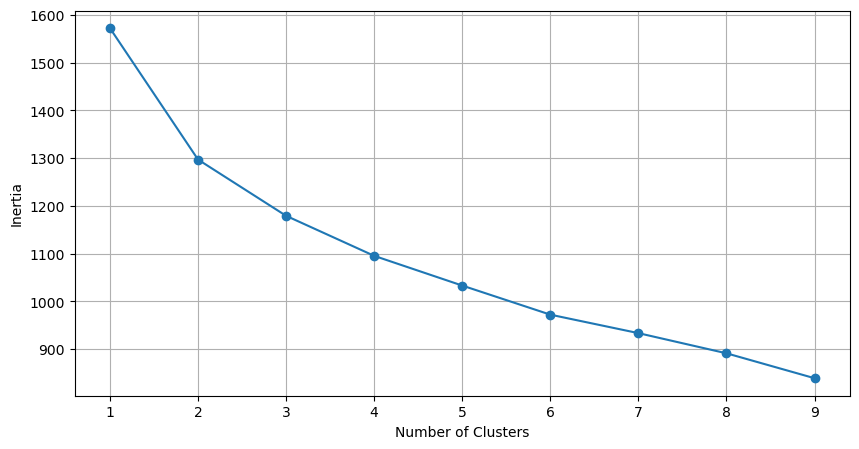

In [10]:
optimise_k_means(datawithoutknowledge_mapped, 10, '../figures/05_K-meansWithoutIndustryKnowledge.png')

In [11]:
kmeans_without = KMeans(n_clusters=6, random_state=42)

In [12]:
kmeans.fit(datawithoutknowledge_mapped)

KMeans(n_clusters=6, random_state=42)

In [13]:
datawithoutknowledge_mapped['kmeans_6'] = kmeans.labels_

In [14]:
datawithoutknowledge_mapped_cluster_assignment = datawithoutknowledge_mapped.groupby('kmeans_6').apply(lambda x: list(x.index)).to_dict()

print("\nAssignment of objects to clusters:")
for cluster, members in datawithoutknowledge_mapped_cluster_assignment.items():
    cluster +=1
    print(f"Cluster {cluster}: {members}")


Przypisanie obiektów do klastrów:
Klaster 1: [19, 25, 28, 34]
Klaster 2: [5, 6, 10, 13, 21, 26, 30, 32, 33, 43, 49, 57]
Klaster 3: [7, 9, 11, 14, 15, 16, 20, 22, 27, 35, 37, 42, 46, 48, 50, 52, 53, 54, 55, 58, 61, 67]
Klaster 4: [3, 12, 18, 23, 36, 41, 44, 47, 64]
Klaster 5: [1, 2, 4, 24, 29, 38, 45, 63]
Klaster 6: [17, 31, 51, 59]


## Conclusion
After the analysis, we can conclude that better results are produced by using data without industry knowledge. Industry knowledge badly influence members inside clusters, because of misconception of questions connected with them inside survey. By leaving out industry-specific knowledge, we achieve clusters that more efficiently group similar objects together. We used Lloyd's algorithm for our k-means clustering. Lloyd's algorithm iteratively refines cluster centers by alternating between assigning each data point to the nearest cluster center and then updating the cluster centers based on the mean of the assigned points. This process continues until convergence, ensuring an effective grouping of similar data points.